## Question 1


In [18]:
# Step 1 Import the necessary libraries , URL and assign Dataset to variable.
import pandas as pd
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt

In [160]:
#Step 2. Import the dataset from the address. 
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

#Step 3. Assign it to a variable called users

users = pd.read_csv(url, sep='|') #Assigned as Users
print(users)


     user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]


In [13]:
#Step 4: Discover what is the mean age per occupation

mean_age_per_occupation = users.groupby('occupation')['age'].mean()
 

#Convert the Series to a DataFrame for tabulate
df_mean_age_per_occupation = mean_age_per_occupation.reset_index()

# Print the output in a table format
print(tabulate(df_mean_age_per_occupation, headers='keys', tablefmt='pretty'))

+----+---------------+--------------------+
|    |  occupation   |        age         |
+----+---------------+--------------------+
| 0  | administrator | 38.74683544303797  |
| 1  |    artist     | 31.392857142857142 |
| 2  |    doctor     | 43.57142857142857  |
| 3  |   educator    | 42.01052631578948  |
| 4  |   engineer    | 36.38805970149254  |
| 5  | entertainment | 29.22222222222222  |
| 6  |   executive   |      38.71875      |
| 7  |  healthcare   |      41.5625       |
| 8  |   homemaker   | 32.57142857142857  |
| 9  |    lawyer     |       36.75        |
| 10 |   librarian   |        40.0        |
| 11 |   marketing   | 37.61538461538461  |
| 12 |     none      | 26.555555555555557 |
| 13 |     other     | 34.523809523809526 |
| 14 |  programmer   | 33.121212121212125 |
| 15 |    retired    | 63.07142857142857  |
| 16 |   salesman    | 35.666666666666664 |
| 17 |   scientist   | 35.54838709677419  |
| 18 |    student    | 22.081632653061224 |
| 19 |  technician   | 33.148148

In [14]:
# Step 5: Discover the Male ratio per occupation and sort it from most to least
def male_ratio(group):
    total = len(group)
    male_count = (group['gender'] == 'M').sum()
    return male_count / total

male_ratio_per_occupation = users.groupby('occupation').apply(male_ratio)
sorted_male_ratio_per_occupation = male_ratio_per_occupation.sort_values(ascending=False)

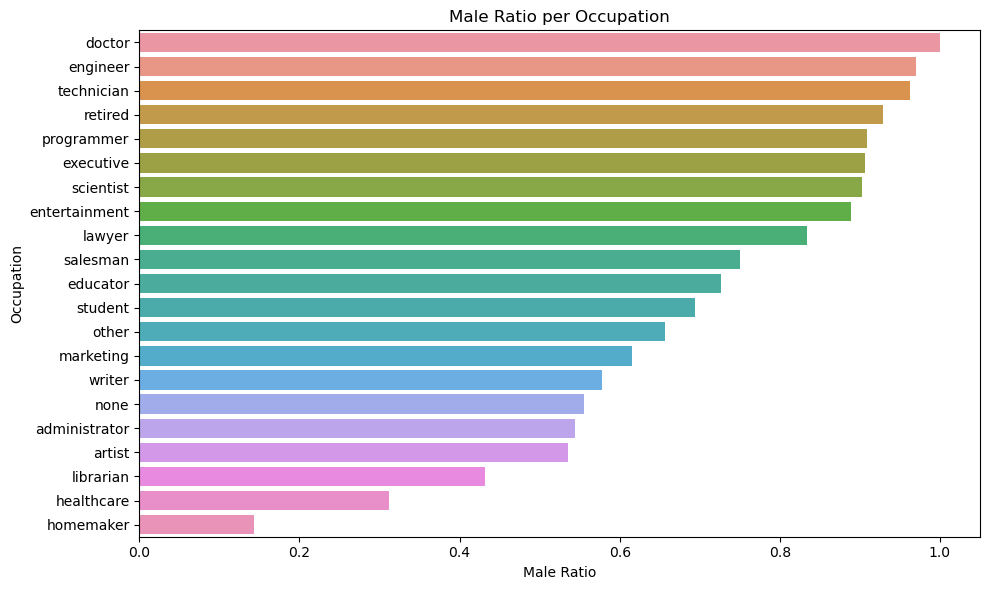

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_male_ratio_per_occupation.values, y=sorted_male_ratio_per_occupation.index)
plt.title('Male Ratio per Occupation')
plt.xlabel('Male Ratio')
plt.ylabel('Occupation')

plt.tight_layout()
plt.show()

Male ratio is highest among Doctors (100.0%), Engineers (97.0%), and Technicians (96.3%), while lowest in Homemakers (14.3%) and Healthcare (31.3%).


In [31]:
# Step 6: For each occupation, calculate the minimum and maximum ages
occupation_age = users.groupby('occupation')['age'].agg(['min', 'max'])
print(tabulate(occupation_age, headers='keys', tablefmt='pretty'))

+---------------+-----+-----+
|  occupation   | min | max |
+---------------+-----+-----+
| administrator | 21  | 70  |
|    artist     | 19  | 48  |
|    doctor     | 28  | 64  |
|   educator    | 23  | 63  |
|   engineer    | 22  | 70  |
| entertainment | 15  | 50  |
|   executive   | 22  | 69  |
|  healthcare   | 22  | 62  |
|   homemaker   | 20  | 50  |
|    lawyer     | 21  | 53  |
|   librarian   | 23  | 69  |
|   marketing   | 24  | 55  |
|     none      | 11  | 55  |
|     other     | 13  | 64  |
|  programmer   | 20  | 63  |
|    retired    | 51  | 73  |
|   salesman    | 18  | 66  |
|   scientist   | 23  | 55  |
|    student    |  7  | 42  |
|  technician   | 21  | 55  |
|    writer     | 18  | 60  |
+---------------+-----+-----+


In [47]:
##Step 7. For each combination of occupation and sex, calculate the mean age 
occupation_sex_mean_age = users.groupby(['occupation', 'gender'])['age'].mean().reset_index()
occupation_sex_mean_age = users.groupby(['occupation', 'gender'])['age'].mean().reset_index()

mean_age_table = pd.pivot_table(occupation_sex_mean_age, values='age', index='occupation', columns='gender')

# Rename the columns
mean_age_table.columns = ['Female', 'Male']
mean_age_table = mean_age_table.rename_axis('Occupation')
mean_age_table = mean_age_table[['Male', 'Female']]
mean_age_table = mean_age_table.fillna(0) 
mean_age_table

,Male,Female
Occupation,,
administrator,37.162791,40.638889
artist,32.333333,30.307692
doctor,43.571429,0.000000
educator,43.101449,39.115385
engineer,36.600000,29.500000
entertainment,29.000000,31.000000
executive,38.172414,44.000000
healthcare,45.400000,39.818182
homemaker,23.000000,34.166667


In [46]:
#Step 8. For each occupation present the percentage of women and men

def gender_percentage(group):
    total = len(group)
    female_count = (group['gender'] == 'F').sum()
    male_count = (group['gender'] == 'M').sum()
    female_percentage = (female_count / total) * 100
    male_percentage = (male_count / total) * 100
    return pd.Series({ 'Male Percentage': male_percentage, 'Female Percentage': female_percentage})

occupation_gender_percentages = users.groupby('occupation').apply(gender_percentage)
occupation_gender_percentages = occupation_gender_percentages.applymap('{:.2f}%'.format)

occupation_gender_percentages

,Male Percentage,Female Percentage
occupation,,
administrator,54.43%,45.57%
artist,53.57%,46.43%
doctor,100.00%,0.00%
educator,72.63%,27.37%
engineer,97.01%,2.99%
entertainment,88.89%,11.11%
executive,90.62%,9.38%
healthcare,31.25%,68.75%
homemaker,14.29%,85.71%


## Question 2 :Euro Teams


In [49]:
#Step 1. Imported the necessary libraries

#Step 2. Imported the dataset from this address
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"

#Step 3. Assign it to a variable called euro12 
euro12 = pd.read_csv(url)
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [70]:
# Step 4: Select only the Goal column
goal_column = euro12['Goals']
goal_table = pd.DataFrame({'Goals': goal_column})
table = tabulate(goal_table, headers='keys', tablefmt='pretty')
print(table)

+----+-------+
|    | Goals |
+----+-------+
| 0  |   4   |
| 1  |   4   |
| 2  |   4   |
| 3  |   5   |
| 4  |   3   |
| 5  |  10   |
| 6  |   5   |
| 7  |   6   |
| 8  |   2   |
| 9  |   2   |
| 10 |   6   |
| 11 |   1   |
| 12 |   5   |
| 13 |  12   |
| 14 |   5   |
| 15 |   2   |
+----+-------+


In [161]:
# Step 5: How many team participated in the Euro2012?
unique_teams = euro12['Team'].nunique()
print("\nThe Total Number of Teams Participated:", unique_teams)


The Total Number of Teams Participated: 16


In [163]:
# Step 6:What is the number of columns in the dataset?
number_of_columns = len(euro12.columns)
print("The Total Number of Columns:", number_of_columns)

The Total Number of Columns: 35


In [57]:
# Step 7:  View only the columns Team, Yellow Cards and Red Cards and assign themto a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
table = tabulate(discipline, headers='keys', tablefmt='grid')
print(table)

+----+---------------------+----------------+-------------+
|    | Team                |   Yellow Cards |   Red Cards |
+====+=====================+================+=============+
|  0 | Croatia             |              9 |           0 |
+----+---------------------+----------------+-------------+
|  1 | Czech Republic      |              7 |           0 |
+----+---------------------+----------------+-------------+
|  2 | Denmark             |              4 |           0 |
+----+---------------------+----------------+-------------+
|  3 | England             |              5 |           0 |
+----+---------------------+----------------+-------------+
|  4 | France              |              6 |           0 |
+----+---------------------+----------------+-------------+
|  5 | Germany             |              4 |           0 |
+----+---------------------+----------------+-------------+
|  6 | Greece              |              9 |           1 |
+----+---------------------+------------

In [60]:
# Step 8: Sort the teams by Red Cards, then by Yellow Cards
discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)
print(tabulate(discipline_sorted, headers='keys', tablefmt='grid'))

+----+---------------------+----------------+-------------+
|    | Team                |   Yellow Cards |   Red Cards |
+====+=====================+================+=============+
|  6 | Greece              |              9 |           1 |
+----+---------------------+----------------+-------------+
|  9 | Poland              |              7 |           1 |
+----+---------------------+----------------+-------------+
| 11 | Republic of Ireland |              6 |           1 |
+----+---------------------+----------------+-------------+
|  7 | Italy               |             16 |           0 |
+----+---------------------+----------------+-------------+
| 10 | Portugal            |             12 |           0 |
+----+---------------------+----------------+-------------+
| 13 | Spain               |             11 |           0 |
+----+---------------------+----------------+-------------+
|  0 | Croatia             |              9 |           0 |
+----+---------------------+------------

In [61]:
# Step 9: Calculate the mean Yellow Cards per Team
mean_yellow_cards = discipline['Yellow Cards'].mean()
print("Mean Yellow Cards given per Team:", mean_yellow_cards)

Mean Yellow Cards given per Team: 7.4375


In [62]:
# Step 10: Filter teams that scored more than 6 goals
score_more_than_6_goals = euro12[euro12['Goals'] > 6]
print(score_more_than_6_goals)

       Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5   Germany     10               32                32             47.8%   
13    Spain     12               42                33             55.9%   

   % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5             15.6%                          80             2              1   
13            16.0%                         100             0              1   

    Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                      0  ...          10                 62.6%         63   
13                     0  ...          15                 93.8%        102   

   Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5              49        12             4          0       15        15   
13             83        19            11          0       17        17   

    Players Used  
5             17  
13            18  

[2 rows x 35 c

In [66]:
# Step 11: Select the teams that start with G
teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]
print(teams_starting_with_G)

      Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5  Germany     10               32                32             47.8%   
6   Greece      5                8                18             30.7%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5            15.6%                          80             2              1   
6            19.2%                          32             1              1   

   Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                     0  ...          10                 62.6%         63   
6                     1  ...          13                 65.1%         67   

  Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5             49        12             4          0       15        15   
6             48        12             9          1       12        12   

   Players Used  
5            17  
6            20  

[2 rows x 35 columns]


In [67]:
# Step 12: Select the first 7 columns
first_7_columns = euro12.iloc[:, :7]
print(first_7_columns)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [68]:
# Step 13: Select all columns except the last 3
all_except_last_3_columns = euro12.iloc[:, :-3]
print(all_except_last_3_columns)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [69]:
#Step 14. Present only the Shooting Accuracy from England, Italy and Russia
shooting_accuracy_selected_teams = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]
print(tabulate(shooting_accuracy_selected_teams, headers='keys', tablefmt='pretty'))

+----+---------+-------------------+
|    |  Team   | Shooting Accuracy |
+----+---------+-------------------+
| 3  | England |       50.0%       |
| 7  |  Italy  |       43.0%       |
| 12 | Russia  |       22.5%       |
+----+---------+-------------------+


## Question 3 :Housing


In [71]:
##Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

In [90]:
# Step 2: Create 3 different Series 
series_dict = {
    'series1': pd.Series(np.random.randint(1, 5, size=100)),
    'series2': pd.Series(np.random.randint(1, 4, size=100)),
    'series3': pd.Series(np.random.randint(10000, 30001, size=100))
}

# Step 3: Create a DataFrame by joining the Series by column
dataframe = pd.concat(series_dict.values(), axis=1) #Used concat for joining 


# Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
dataframe.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

# Step 5: Create a one column DataFrame with the values of the 3 Series
bigcolumn = pd.DataFrame(pd.concat(series_dict.values(), axis=0))
bigcolumn.reset_index(drop=True, inplace=True)

# Step 6: Check if the DataFrame goes only until index 99
print("Is it true that the DataFrame goes only until index 99?", bigcolumn.index.max() == 99)

# Step 7:Reindex the DataFrame so it goes from 0 to 299
bigcolumn.reset_index(drop=True, inplace=True)

# Display the resulting DataFrames
print("Housing Dataset:")
print(dataframe)
print('\nDataFrame "bigcolumn":')
print(bigcolumn)

Is it true that the DataFrame goes only until index 99? False
Housing Dataset:
    bedrs  bathrs  price_sqr_meter
0       3       1            23685
1       2       2            20494
2       4       2            23117
3       3       2            19581
4       4       2            11756
..    ...     ...              ...
95      4       3            19889
96      2       3            18142
97      3       2            23662
98      4       2            23240
99      1       2            16668

[100 rows x 3 columns]

DataFrame "bigcolumn":
         0
0        3
1        2
2        4
3        3
4        4
..     ...
295  19889
296  18142
297  23662
298  23240
299  16668

[300 rows x 1 columns]


## Question 4 : Wind Statistics



In [103]:
# Step 1: Already Imported the necessary libraries

# Step 2: Import the dataset from the attached file wind.txt
file_path = r"C:\Users\Parth\Desktop\Parth BDAT\1004- Data Programming\Assignments\ProblemSet3\wind.txt"
data = pd.read_table(file_path, sep='\s+', parse_dates=[[0, 1, 2]])

# Step 3: Replace the first 3 columns by a proper datetime index
data.set_index('Yr_Mo_Dy', inplace=True)

# Step 4: Fix the year 2061 issue 
def fix_year(year):
    if year.year > 1989:
        fixed_year = year - pd.DateOffset(years=100)
    else:
        fixed_year = year
    return fixed_year

data.index = data.index.map(fix_year)

# Step 5: Set the right dates it iis datetime64[ns]
data.index = pd.to_datetime(data.index)

# Step 6: Compute how many missing values for each location
count_of_missing_values = data.isnull().sum()

# Step 7: Compute how many non-missing values in total
count_of_non_missing_values = data.count().sum()

# Step 8: Calculate the mean windspeeds of the entire dataset
mean_windspeed = data.mean().mean()

# Step 9:. Create a DataFrame called loc_stats and calculate the min, max and meanwindspeeds and standard deviations of the windspeeds at each location over all thedays
loc_stats = data.aggregate(['min', 'max', 'mean', 'std'])

# Step 10: Calculate statistics for each day
day_stats = data.resample('D').aggregate(['min', 'max', 'mean', 'std'])

# Step 11: Find the average windspeed in January for each location Treat January 1961 and January 1962 both as January.
january_avg = data[data.index.month == 1].resample('Y').mean()

# Step 12: Downsample to yearly (Y) frequency
yearly_data = data.resample('Y').mean()

# Step 13: Downsample to monthly (M) frequency
monthly_data = data.resample('M').mean()

# Step 14: Downsample to weekly (W) frequency
weekly_data = data.resample('W').mean()

# Step 15: Calculate weekly statistics for the first 52 weeks
statastics_weekly = weekly_data[:52].aggregate(['min', 'max', 'mean', 'std'])

# Print the results as needed
print("\n==============Missing Values:================")
print(count_of_missing_values)
print("\n================Total Non-Missing Values:================")
print(count_of_non_missing_values)
print("\n================Mean Windspeed of the Entire Dataset:================")
print(mean_windspeed)
print("\n==============Location Statistics:================")
print(loc_stats)
print("\n================Day Statistics:================")
print(day_stats)
print("\n================January Average for Each Year:================")
print(january_avg)
print("\n================Monthly Data:================")
print(monthly_data)
print("\n================Weekly Data:================")
print(weekly_data)
print("\n==============Weekly Statistics for the First 52 Weeks:================")
print(statastics_weekly)


==============Missing Values:================
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

================Total Non-Missing Values:================
78857

================Mean Windspeed of the Entire Dataset:================
10.227982360836924

==============Location Statistics:================
            RPT        VAL        ROS        KIL        SHA        BIR  \
min    0.670000   0.210000   1.500000   0.000000   0.130000   0.000000   
max   35.800000  33.370000  33.840000  28.460000  37.540000  26.160000   
mean  12.362987  10.644314  11.660526   6.306468  10.455834   7.092254   
std    5.618413   5.267356   5.008450   3.605811   4.936125   3.968683   

            DUB        CLA        MUL        CLO        BEL        MAL  
min    0.000000   0.000000   0.000000   0.040000   0.130000   0.670000  
max   30.370000  31.080000  25.880000  28.210000  42.380000  42.540000  
mean   9.797343   8.495053   8.4935

## Question 5


In [107]:
# Step 1: Import the necessary libraries

# Step 2: Import the dataset from this address
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

# Step 3: Assigned to the variable 'chipo'

chipo = pd.read_csv(url, sep='\t')

# Step 4: See the first 10 entries
print(chipo.head(10))

# Step 5:  What is the number of observations in the dataset? 
num_of_observations = len(chipo)
print("Number of Observations:", num_of_observations)

# Step 6:What is the number of columns in the dataset?
number_of_columns = len(chipo.columns)
print("Number of Columns:", number_of_columns)

# Step 7: Print the Name of all columns
print("Name of all columns:", chipo.columns.tolist())

# Step 8: How is the dataset indexed?
print("Indexing:", chipo.index)

# Step 9: Most-ordered item
most_ordered_item = chipo['item_name'].value_counts().idxmax()
print("Most-ordered Item:", most_ordered_item)

# Step 10: Number of items ordered for the most-ordered item
number_of_most_ordered_item_count = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print("Number of Items Ordered:", number_of_most_ordered_item_count)

# Step 11: Most ordered item in the choice_description column
number_of_most_ordered_choice = chipo['choice_description'].value_counts().idxmax()
print("Most Ordered Item in Choice Description:", number_of_most_ordered_choice)

# Step 12: Total number of items ordered
total_items_ordered = chipo['quantity'].sum()
print("How many items were orderd in total?:", total_items_ordered)

# Step 13: Convert item price to float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

# Check the item price type
print("Item Price Type:", chipo['item_price'].dtype)

# Step 14: How much was the revenue for the period in the dataset?
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("Total Revenue:", revenue)

# Step 15: . How many orders were made in the period?
num_orders = chipo['order_id'].nunique()
print("Number of Orders:", num_orders)

# Step 16:  What is the average revenue amount per order?
avg_revenue_per_order = revenue / num_orders
print("Average Revenue per Order:", avg_revenue_per_order)

# Step 17: How many different items are sold?
num_different_items = chipo['item_name'].nunique()
print("Number of Different Items Sold:", num_different_items)


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

## Question 6
### Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.


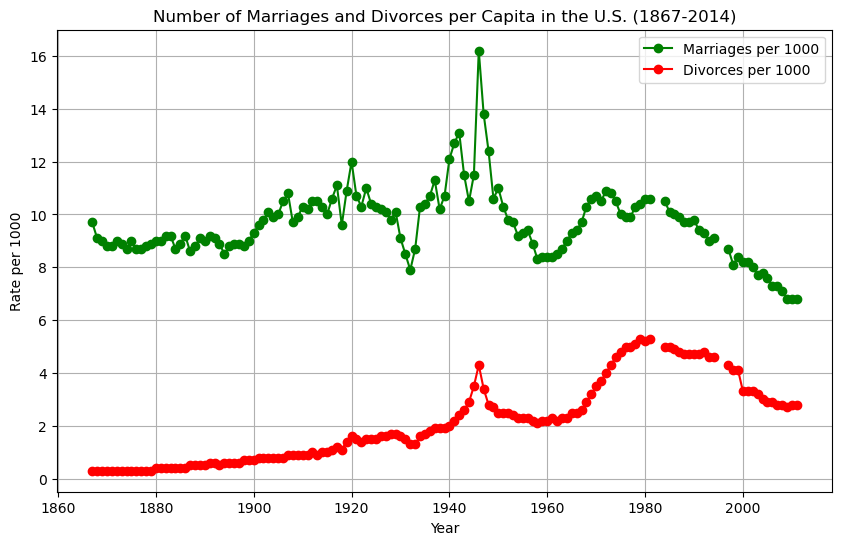

In [116]:
file_path = r"C:\Users\Parth\Desktop\Parth BDAT\1004- Data Programming\Assignments\ProblemSet3\us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(file_path)

plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Marriages_per_1000'], color='green', marker='o', label='Marriages per 1000')
plt.plot(data['Year'], data['Divorces_per_1000'], color='red', marker='o', label='Divorces per 1000')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Rate per 1000')
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1867-2014)')

# Show the legend
plt.legend()
plt.grid(True)
# Show the plot
plt.show()

## Question 7
### Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.

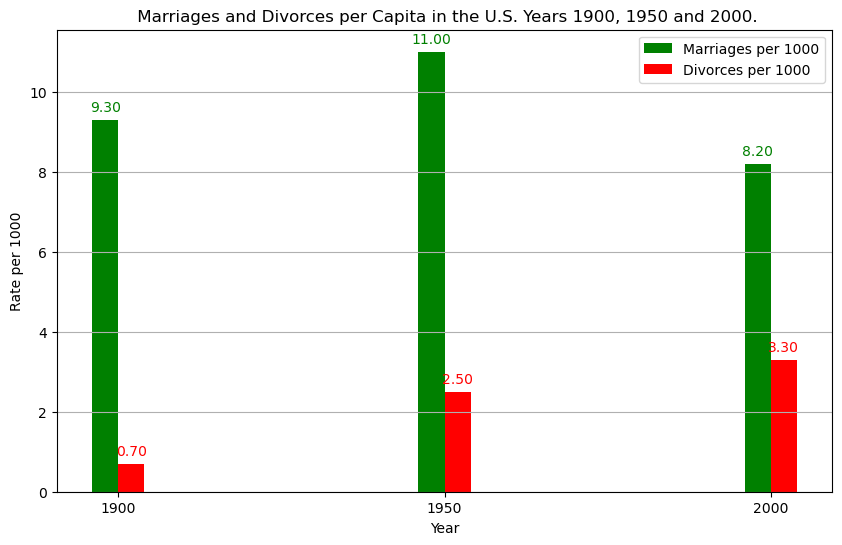

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r"C:\Users\Parth\Desktop\Parth BDAT\1004- Data Programming\Assignments\ProblemSet3\us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(file_path)
selected_years = [1900, 1950, 2000]
filtered_data = data[data['Year'].isin(selected_years)]
plt.figure(figsize=(10, 6))
bar_width = 4
offset = 2
marriage_color = 'green'
divorce_color = 'red'
plt.bar(filtered_data['Year'] - offset, filtered_data['Marriages_per_1000'], width=bar_width, label='Marriages per 1000', color=marriage_color)
plt.bar(filtered_data['Year'] + offset, filtered_data['Divorces_per_1000'], width=bar_width, label='Divorces per 1000', color=divorce_color)

plt.title(" Marriages and Divorces per Capita in the U.S. Years 1900, 1950 and 2000.")
plt.xlabel("Year")
plt.ylabel("Rate per 1000")
plt.xticks(filtered_data['Year'], selected_years)
plt.legend()


for i in range(len(filtered_data)):
    marriage_rate = filtered_data['Marriages_per_1000'].iloc[i]
    divorce_rate = filtered_data['Divorces_per_1000'].iloc[i]
    plt.text(filtered_data['Year'].iloc[i] - offset, marriage_rate + 0.2, f'{marriage_rate:.2f}', ha='center', color=marriage_color)
    plt.text(filtered_data['Year'].iloc[i] + offset, divorce_rate + 0.2, f'{divorce_rate:.2f}', ha='center', color=divorce_color)

plt.grid(axis='y')
plt.show()


## Question 8
### Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. 

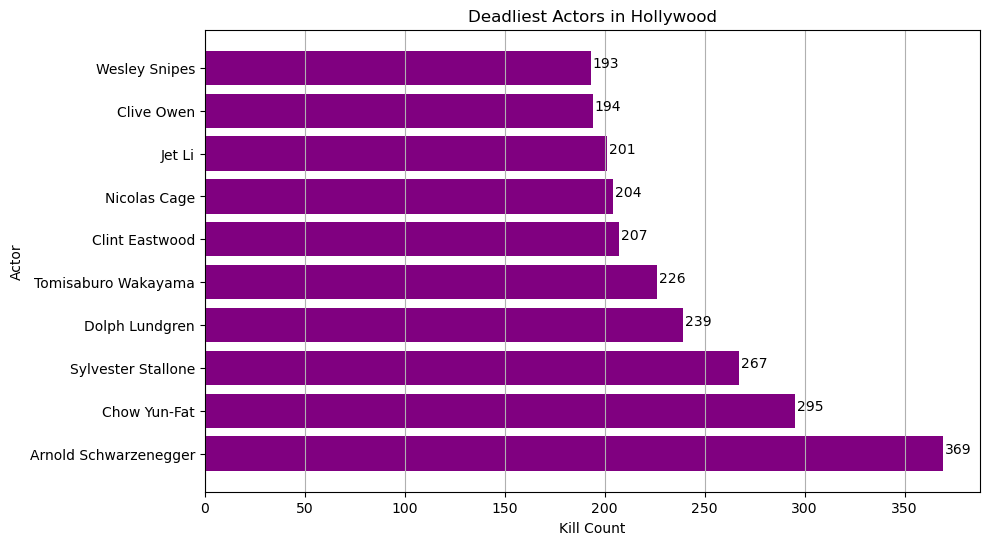

In [126]:
file_path = r"C:\Users\Parth\Desktop\Parth BDAT\1004- Data Programming\Assignments\ProblemSet3\actor_kill_counts.csv"
data = pd.read_csv(file_path)

# Sort the actors by kill count
sorted_data = data.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(sorted_data['Actor'], sorted_data['Count'], color='purple')

plt.title("Deadliest Actors in Hollywood")
plt.xlabel("Kill Count")
plt.ylabel("Actor")
plt.grid(axis='x')

for index, value in enumerate(sorted_data['Count']):
    plt.text(value + 1, index, str(value))


plt.show()

## Question 9

### Create a pie chart showing the fraction of all Roman Emperors that were assassinated.


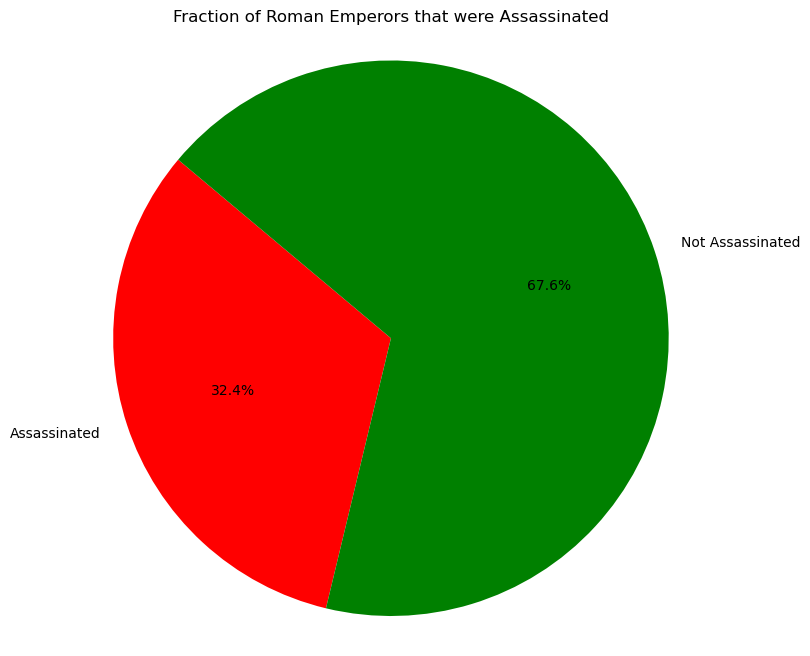

In [132]:
file_path = r"C:\Users\Parth\Desktop\Parth BDAT\1004- Data Programming\Assignments\ProblemSet3\roman-emperor-reigns.csv"
data = pd.read_csv(file_path)

# Count the number of assassinated emperors
emp_count = data[data['Cause_of_Death'] == 'Assassinated']['Emperor'].count()

# Count the number of all emperors
total_emperors = data['Emperor'].count()

# Calculate the fraction of assassinated emperors
fraction_assassinated = assassinated_count / total_emperors

# Create labels for the pie chart
labels = ['Assassinated', 'Not Assassinated']
sizes = [fraction_assassinated, 1 - fraction_assassinated]
colors = ['red', 'green']


plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',startangle=140)

plt.title("Fraction of Roman Emperors that were Assassinated")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

## Question 10

### Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.


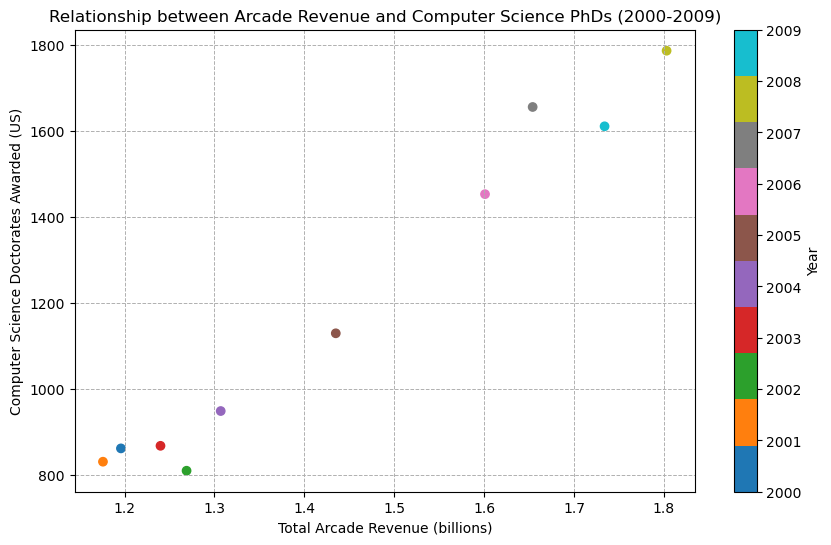

In [159]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r"C:\Users\Parth\Desktop\Parth BDAT\1004- Data Programming\Assignments\ProblemSet3\arcade-revenue-vs-cs-doctorates.csv"
data = pd.read_csv(file_path)

# Filter the data for the years 2000 to 2009
filtered_data = data[(data['Year'] >= 2000) & (data['Year'] <= 2009)]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    x=filtered_data['Total Arcade Revenue (billions)'],
    y=filtered_data['Computer Science Doctorates Awarded (US)'],
    c=filtered_data['Year'],
    cmap='tab10'
)

# Add labels and title
plt.title("Relationship between Arcade Revenue and Computer Science PhDs (2000-2009)")
plt.xlabel("Total Arcade Revenue (billions)")
plt.ylabel("Computer Science Doctorates Awarded (US)")

# Add colorbar
plt.colorbar(label='Year')

# Add grid lines
plt.grid(linestyle='--', linewidth=0.7)

# Show the plot
plt.show()
